In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
import V2RhoT_gibbs_lib as lib  # Importing the module with the function lithostatic_pressure
from scipy.ndimage import gaussian_filter

## Test

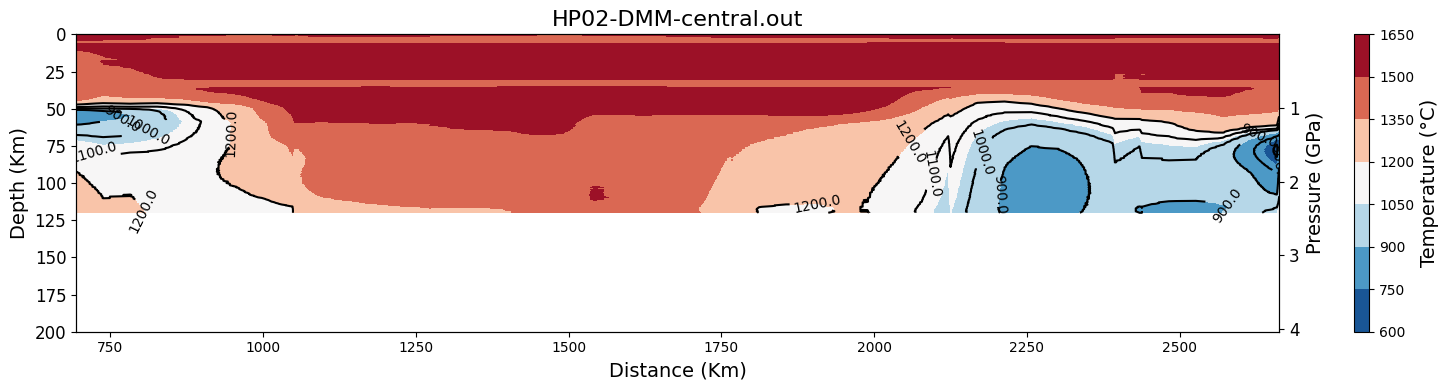

In [70]:
from scipy.ndimage import gaussian_filter
# Specify the input filename
filename = 'HP02-DMM-central.out'

# Load the data
data = np.loadtxt(f'./output/Tibet/{filename}', comments='#', delimiter=',')

# Create the figure and primary axis with a larger figure size
fig, ax1 = plt.subplots(figsize=(16, 4))  # Adjusted size for a larger plot
tri = Triangulation(data[:,1],data[:,2])
scatter1=ax1.tricontourf(tri, data[:,4],cmap='RdBu_r')#,levels=np.arange(15,1300,100))
#contour = ax1.contourf(grid_x, grid_y, grid_z, levels=15, cmap='viridis', alpha=0.5)  # Contours with transparency
contour_lines = ax1.tricontour(tri, data[:,4], levels=np.arange(500,1300,100),colors='k')  # Add contour lines
scatter2 = gaussian_filter(scatter1, sigma=5)

# Add contour labels
ax1.clabel(contour_lines, inline=True, fontsize=10, fmt='%.1f')  # Adjust formatting as needed
# Set the plot title as the filename (including the extension)
ax1.set_title(filename, fontsize=16)  # Increased title font size
# Customize the primary axes with larger font sizes
ax1.set_xlabel('Distance (Km)', fontsize=14)
ax1.set_ylabel('Depth (Km)', fontsize=14)
ax1.set_ylim(200, 0)  # Invert y-axis for depth
ax1.tick_params(axis='y', labelsize=12)  # Increase tick label size

# Add a colorbar for the scatter plot with larger label size
cbar1 = plt.colorbar(scatter1, ax=ax1)#, pad=0.15)
cbar1.set_label('Temperature (°C)', fontsize=14)


# Create a secondary y-axis for Pressure
ax2 = ax1.twinx()
ax2.set_ylabel('Pressure (GPa)', fontsize=14)  # Label in GPa with larger font
ax2.set_ylim(data[:, 3].min() * 1e-4, data[:, 3].max() * 1e-4)  # Convert pressure units and set limits
ax2.invert_yaxis()  # Invert the pressure axis
ax2.tick_params(axis='y', labelsize=12)  # Increase tick label size

'''
# Create a secondary x-axis at the top for Vs with larger font size
ax3 = ax1.twiny()
ax3.set_xlabel('Vs (km/s)', fontsize=14)
ax3.set_xlim(data[:, 7].min(), data[:, 7].max())  # Set limits based on Vs data
ax3.tick_params(axis='x', labelsize=12)  # Increase tick label size
'''
# Adjust the layout to prevent overlap
fig.tight_layout()

# Save the plot using the filename as title.png
plt.savefig(f'{filename}.png')  # Save as filename.png
plt.show()


# Plot Profile

In [2]:
from scipy.ndimage import gaussian_filter

def plot_profile_mesh(ax1,filename,T_min=0,T_max=1500,T_inc=100,max_depth=200,to_plot=4):
    # Specify the input filename
    #filename = 'HP02-DMM-central.out'
    
    # Load the data
    #data = np.loadtxt(f'./output/Tibet/{filename}', comments='#', delimiter=',')
    data = np.loadtxt(filename, comments='#', delimiter=',')
    
    # Create the figure and primary axis with a larger figure size
    #fig, ax1 = plt.subplots(figsize=(16, 4))  # Adjusted size for a larger plot
    tri = Triangulation(data[:,1],data[:,2])
    scatter1=ax1.tricontourf(tri, data[:,to_plot],cmap='RdBu_r',levels=np.arange(T_min,T_max,T_inc))
    #contour = ax1.contourf(grid_x, grid_y, grid_z, levels=15, cmap='viridis', alpha=0.5)  # Contours with transparency
    scatter2 = gaussian_filter(scatter1, sigma=5)

    contour_lines = ax1.tricontour(tri, data[:,4], levels=np.arange(T_min,T_max,T_inc),colors='k')  # Add contour lines
    # Add contour labels
    ax1.clabel(contour_lines, inline=True, fontsize=10, fmt='%.1f')  # Adjust formatting as needed
    # Set the plot title as the filename (including the extension)
    ax1.set_title(filename, fontsize=16)  # Increased title font size
    # Customize the primary axes with larger font sizes
    ax1.set_xlabel('Distance (Km)', fontsize=14)
    ax1.set_ylabel('Depth (Km)', fontsize=14)
    ax1.set_ylim(max_depth, 0)  # Invert y-axis for depth
    ax1.tick_params(axis='y', labelsize=12)  # Increase tick label size
    
    # Add a colorbar for the scatter plot with larger label size
    cbar1 = plt.colorbar(scatter1, ax=ax1)#, pad=0.15)
    cbar1.set_label('Temperature (°C)', fontsize=14)
    
    
    # Create a secondary y-axis for Pressure
    ax2 = ax1.twinx()
    ax2.set_ylabel('Pressure (GPa)', fontsize=14)  # Label in GPa with larger font
    ax2.set_ylim(data[:, 3].min() * 1e-4, data[:, 3].max() * 1e-4)  # Convert pressure units and set limits
    ax2.invert_yaxis()  # Invert the pressure axis
    ax2.tick_params(axis='y', labelsize=12)  # Increase tick label size
    
    '''
    # Create a secondary x-axis at the top for Vs with larger font size
    ax3 = ax1.twiny()
    ax3.set_xlabel('Vs (km/s)', fontsize=14)
    ax3.set_xlim(data[:, 7].min(), data[:, 7].max())  # Set limits based on Vs data
    ax3.tick_params(axis='x', labelsize=12)  # Increase tick label size
    '''
    # Adjust the layout to prevent overlap
    fig.tight_layout()
    
    # Save the plot using the filename as title.png
    plt.savefig(f'{filename}.png')  # Save as filename.png
    plt.show()
    
def plot_profile(filename,T_min=0,T_max=1500,T_inc=100,max_depth=200,to_plot=4):
    # Specify the input filename
    #filename = 'HP02-DMM-central.out'
    
    # Load the data
    #data = np.loadtxt(f'./output/Tibet/{filename}', comments='#', delimiter=',')
    data = np.loadtxt(filename, comments='#', delimiter=',')
    
    # Create the figure and primary axis with a larger figure size
    fig, ax1 = plt.subplots(figsize=(16, 4))  # Adjusted size for a larger plot
    tri = Triangulation(data[:,1],data[:,2])
    scatter1=ax1.tricontourf(tri, data[:,to_plot],cmap='RdBu_r',levels=np.arange(T_min,T_max,T_inc))
    #contour = ax1.contourf(grid_x, grid_y, grid_z, levels=15, cmap='viridis', alpha=0.5)  # Contours with transparency
    scatter2 = gaussian_filter(scatter1, sigma=5)

    contour_lines = ax1.tricontour(tri, data[:,4], levels=np.arange(T_min,T_max,T_inc),colors='k')  # Add contour lines
    # Add contour labels
    ax1.clabel(contour_lines, inline=True, fontsize=10, fmt='%.1f')  # Adjust formatting as needed
    # Set the plot title as the filename (including the extension)
    ax1.set_title(filename, fontsize=16)  # Increased title font size
    # Customize the primary axes with larger font sizes
    ax1.set_xlabel('Distance (Km)', fontsize=14)
    ax1.set_ylabel('Depth (Km)', fontsize=14)
    ax1.set_ylim(max_depth, 0)  # Invert y-axis for depth
    ax1.tick_params(axis='y', labelsize=12)  # Increase tick label size
    
    # Add a colorbar for the scatter plot with larger label size
    cbar1 = plt.colorbar(scatter1, ax=ax1)#, pad=0.15)
    cbar1.set_label('Temperature (°C)', fontsize=14)
    
    
    # Create a secondary y-axis for Pressure
    ax2 = ax1.twinx()
    ax2.set_ylabel('Pressure (GPa)', fontsize=14)  # Label in GPa with larger font
    ax2.set_ylim(data[:, 3].min() * 1e-4, data[:, 3].max() * 1e-4)  # Convert pressure units and set limits
    ax2.invert_yaxis()  # Invert the pressure axis
    ax2.tick_params(axis='y', labelsize=12)  # Increase tick label size
    
    '''
    # Create a secondary x-axis at the top for Vs with larger font size
    ax3 = ax1.twiny()
    ax3.set_xlabel('Vs (km/s)', fontsize=14)
    ax3.set_xlim(data[:, 7].min(), data[:, 7].max())  # Set limits based on Vs data
    ax3.tick_params(axis='x', labelsize=12)  # Increase tick label size
    '''
    # Adjust the layout to prevent overlap
    fig.tight_layout()
    
    # Save the plot using the filename as title.png
    plt.savefig(f'{filename}.png')  # Save as filename.png
    plt.show()
    

# Profiles

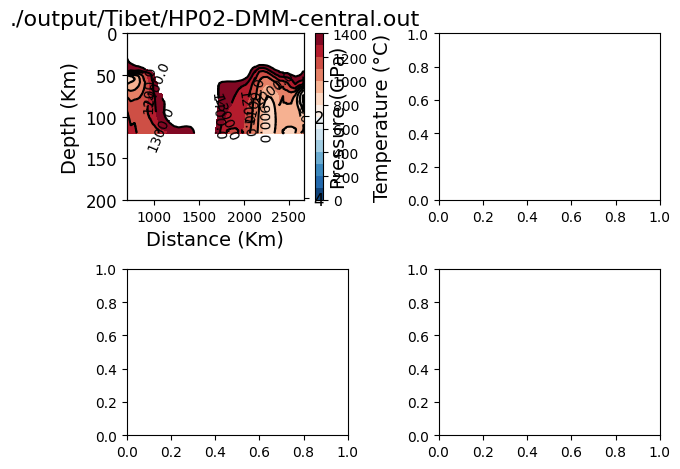

In [3]:
fig,ax=plt.subplots(2,2)
axes=ax[0,0]
plot_profile_mesh(axes,'./output/Tibet/HP02-DMM-central.out')

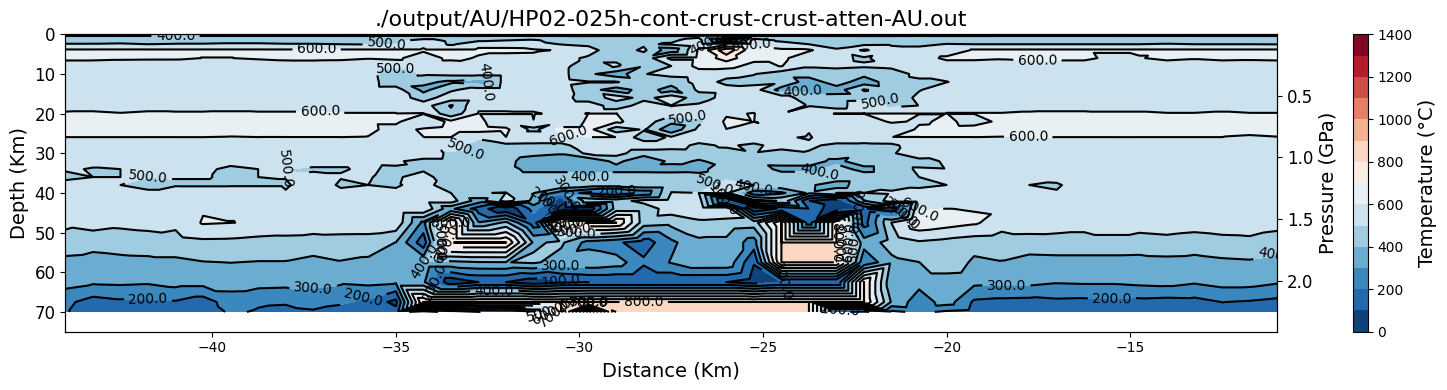

In [5]:
plot_profile('./output/AU/HP02-025h-cont-crust-crust-atten-AU.out',max_depth=75)

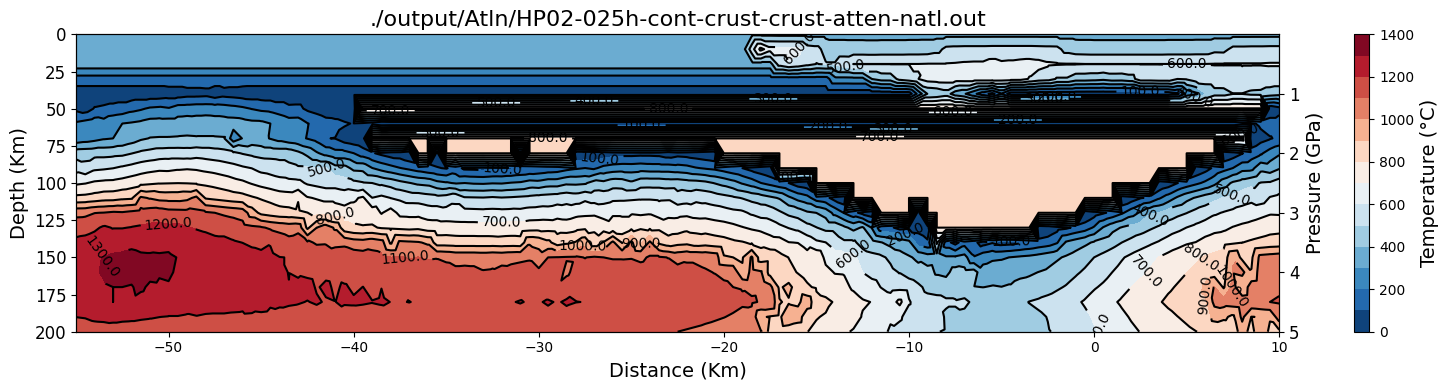

In [7]:
plot_profile('./output/Atln/HP02-025h-cont-crust-crust-atten-natl.out',max_depth=200)

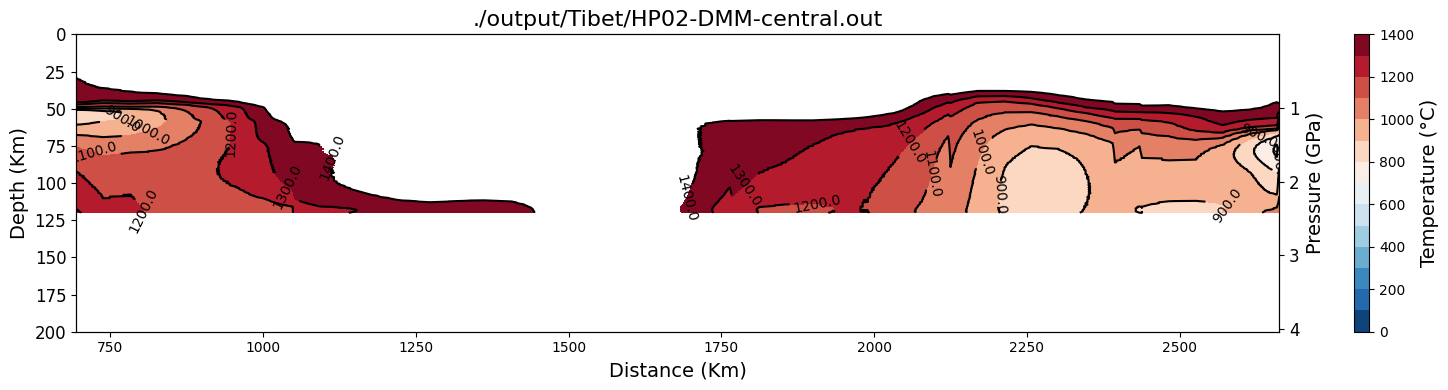

In [72]:
plot_profile('./output/Tibet/HP02-DMM-central.out',max_depth=200)

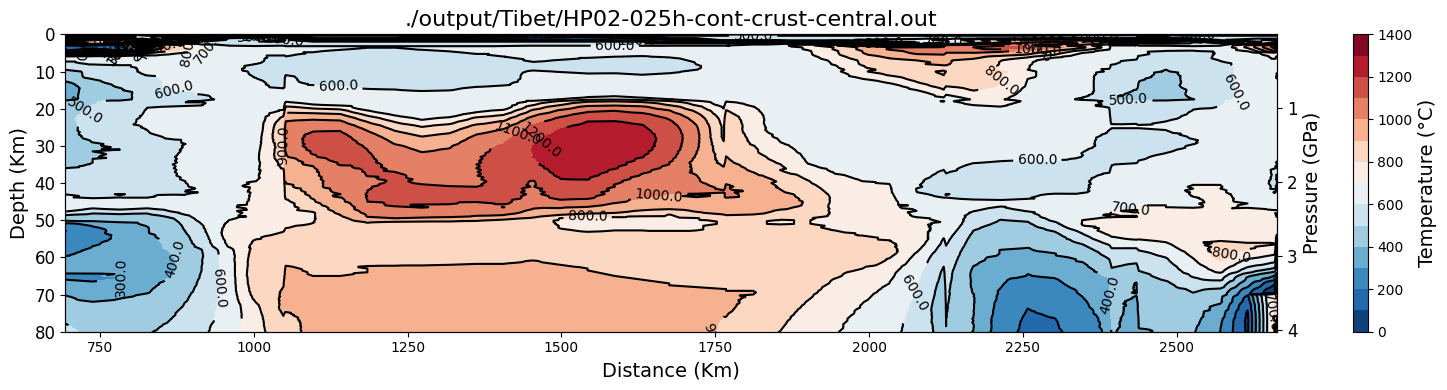

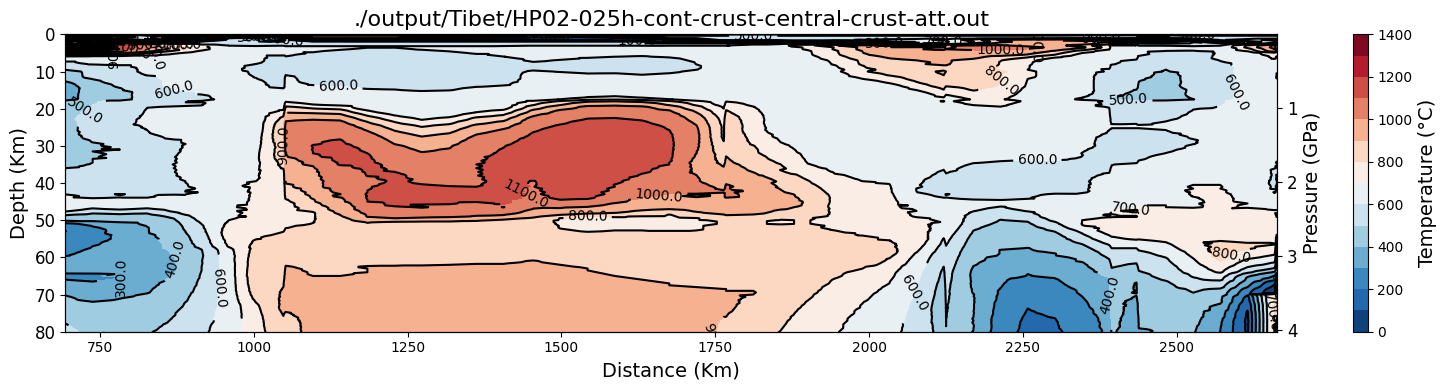

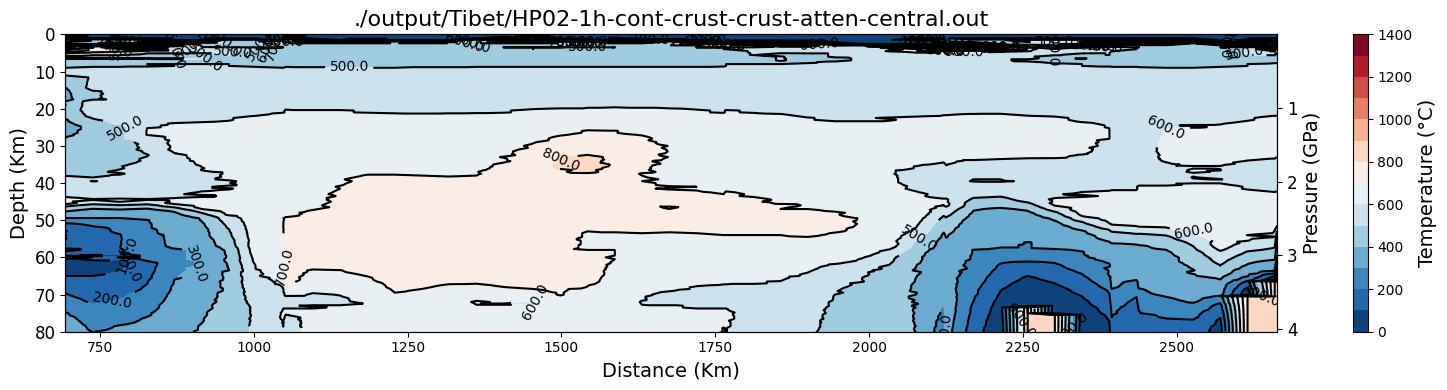

In [88]:
plot_profile('./output/Tibet/HP02-025h-cont-crust-central.out',T_max=1500,max_depth=80)
plot_profile('./output/Tibet/HP02-025h-cont-crust-central-crust-att.out',T_max=1500,max_depth=80)
plot_profile('./output/Tibet/HP02-1h-cont-crust-crust-atten-central.out',T_max=1500,max_depth=80)

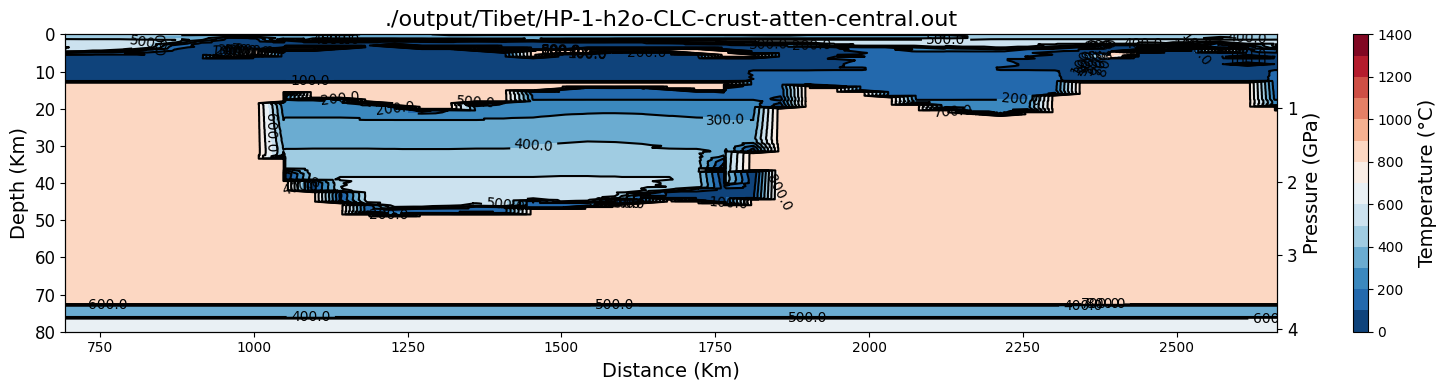

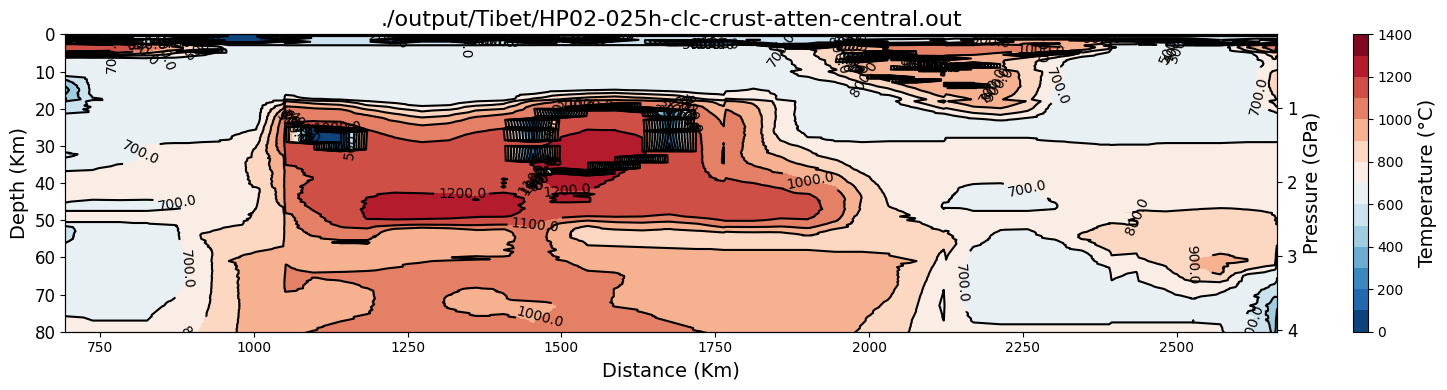

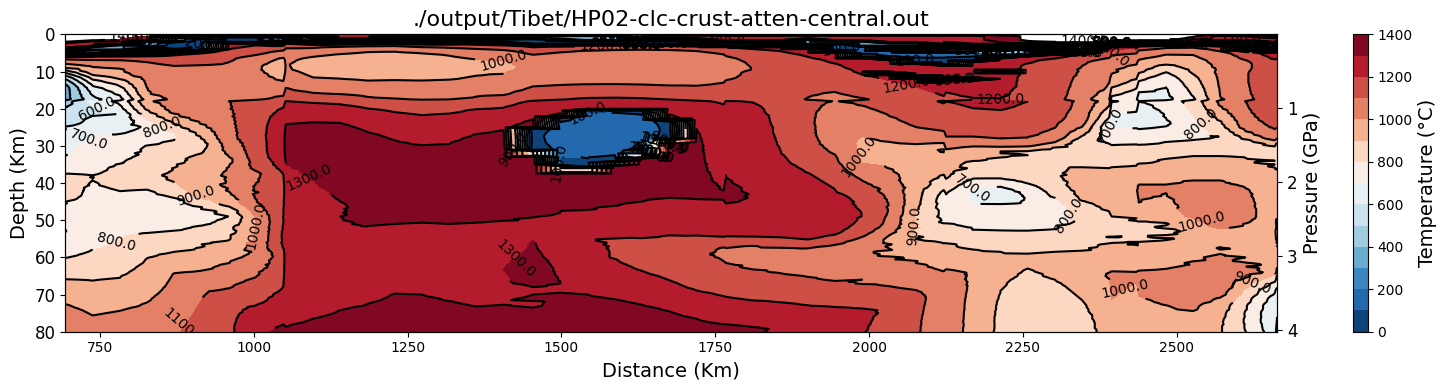

In [79]:
plot_profile('./output/Tibet/HP-1-h2o-CLC-crust-atten-central.out',T_max=1500,max_depth=80)
plot_profile('./output/Tibet/HP02-025h-clc-crust-atten-central.out',T_max=1500,max_depth=80)
plot_profile('./output/Tibet/HP02-clc-crust-atten-central.out',T_max=1500,max_depth=80)

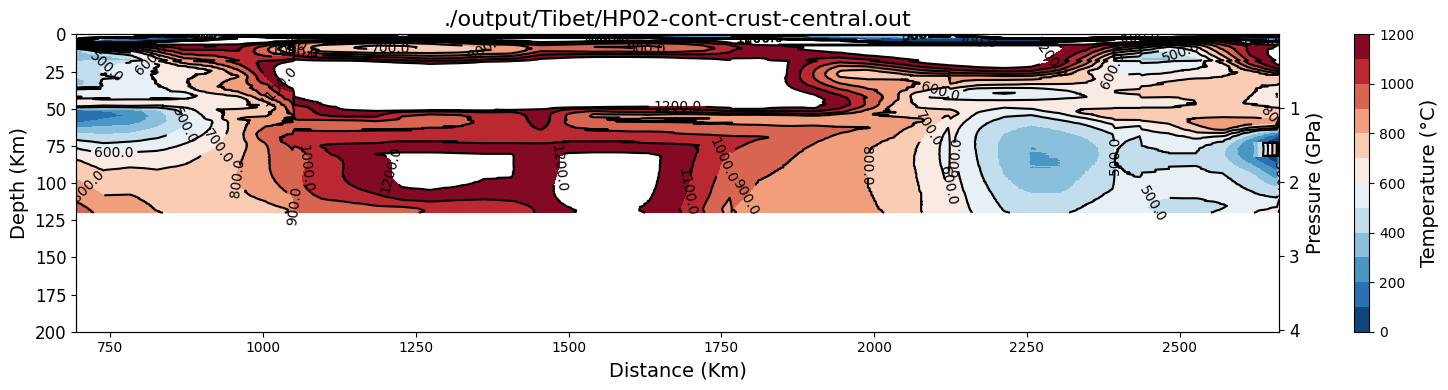

In [50]:
plot_profile('./output/Tibet/HP02-cont-crust-central.out',T_max=1300)

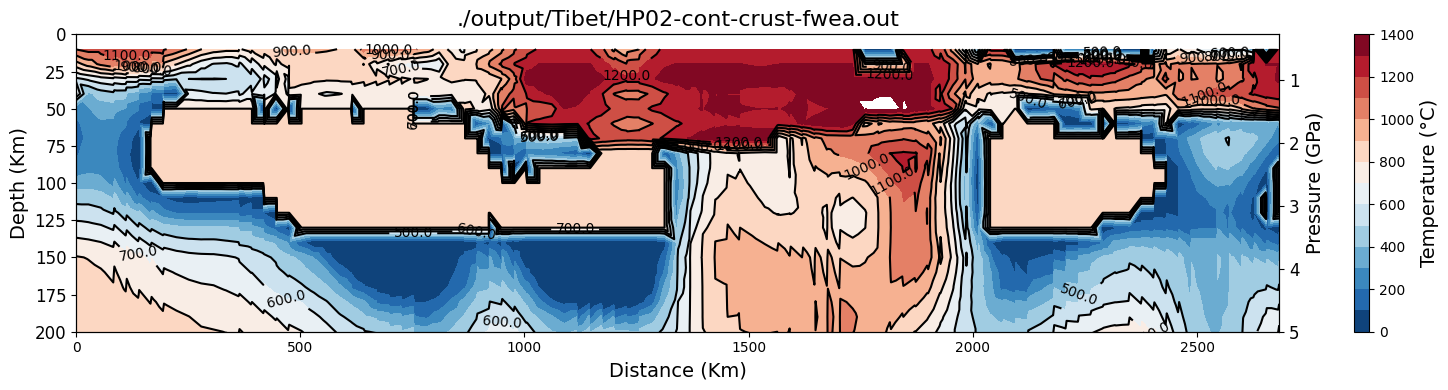

In [38]:
plot_profile('./output/Tibet/HP02-cont-crust-fwea.out',T_max=1500)

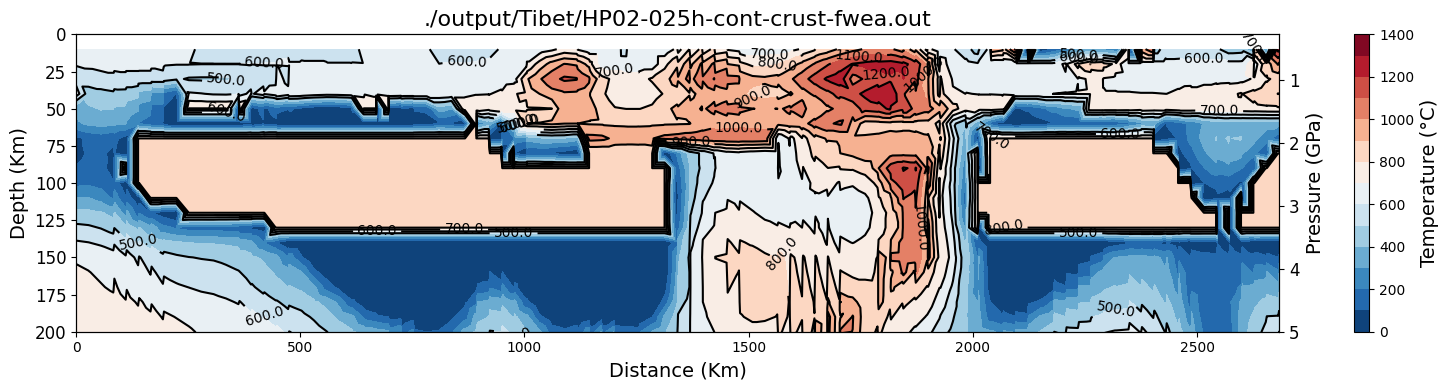

In [53]:
plot_profile('./output/Tibet/HP02-025h-cont-crust-fwea.out',T_max=1500)

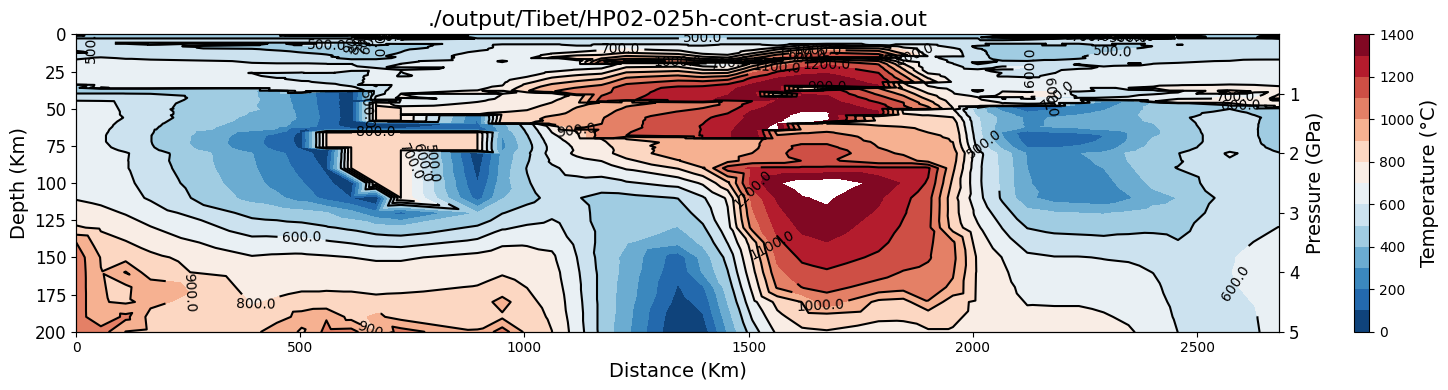

In [52]:
plot_profile('./output/Tibet/HP02-025h-cont-crust-asia.out',T_max=1500)

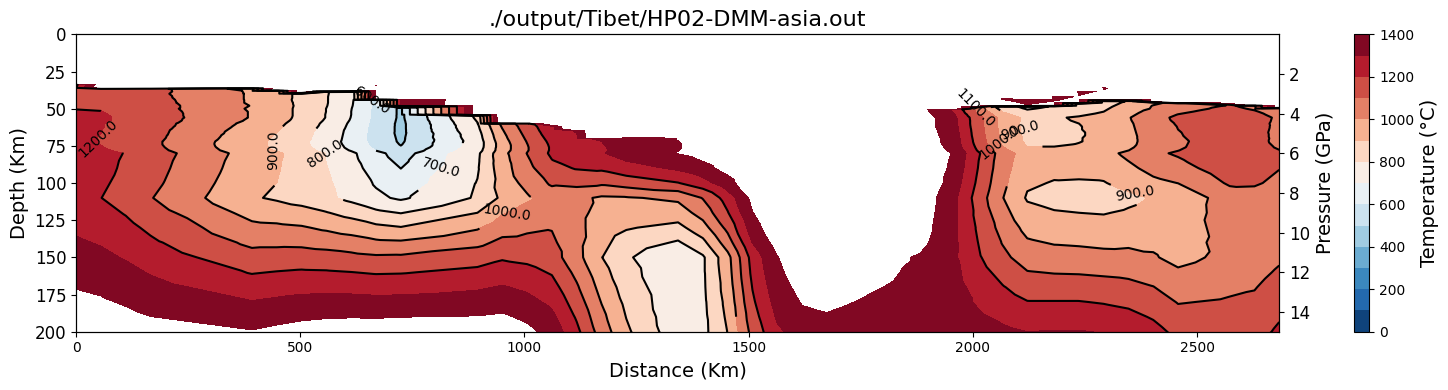

In [40]:
plot_profile('./output/Tibet/HP02-DMM-asia.out',T_max=1500)

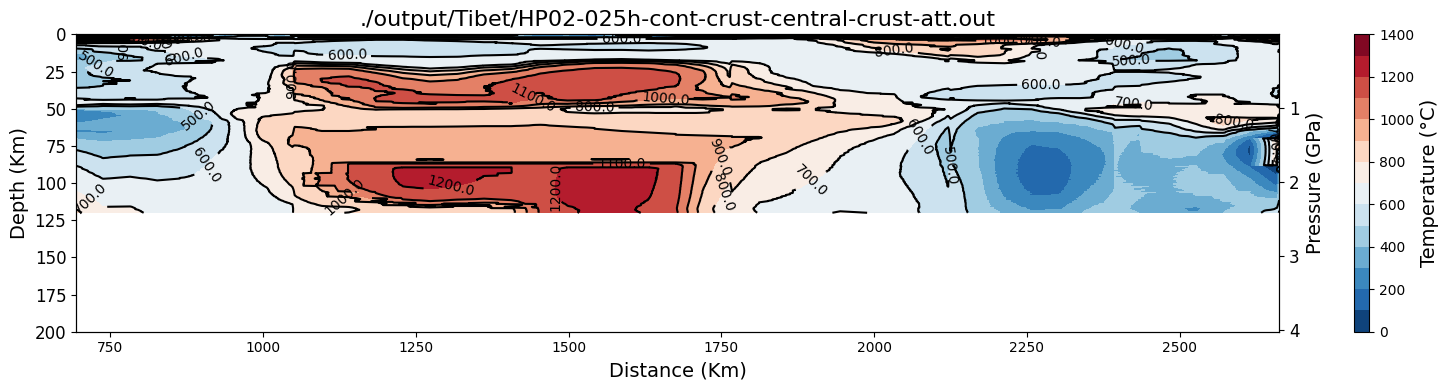

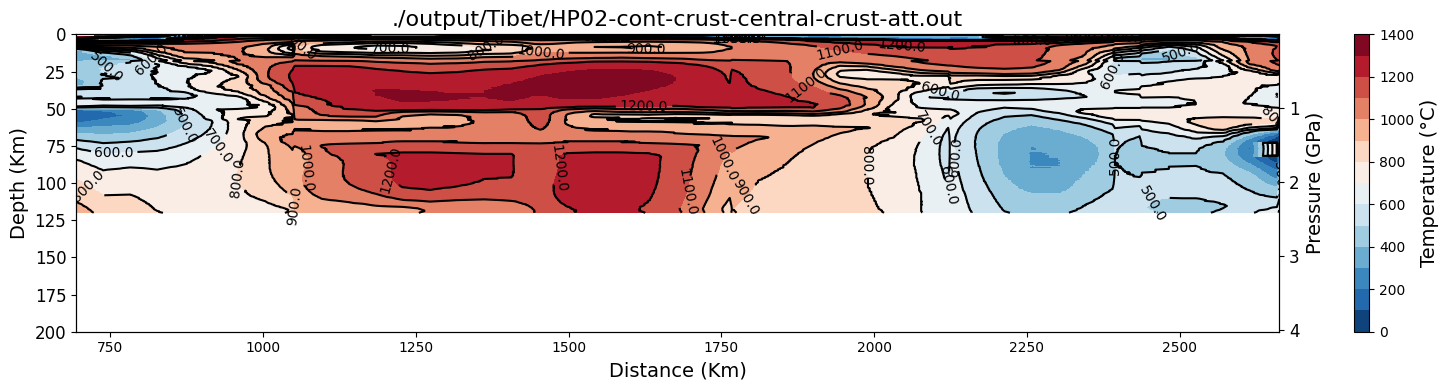

In [55]:
plot_profile('./output/Tibet/HP02-cont-crust-central-crust-att.out',T_max=1500)